# Loan Approval Predictor using Logistic Regression (Scikit-Learn)

Build a supervised machine learning model (logistic regression) to predict whether a loan applicant should be approved or rejected based on historical data. This project will introduce you to core concepts in classification, data preprocessing, model evaluation, and interpretation.

Approved = 0, Rejected = 1

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Okay First load the data
then you have to separate it between x and y (target)
then check for any preprocessing you can do on it:
* If there are missing values, fill it upp
* Scale the values using StandardScaler
* For labels, use onehot encoder to change them to binary values
* I think that is the only preprocessing I need to do on the dataset based on just looking at it
* Then split to train, validation and test set

**Data Collection & Exploration**

Link to dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data 

In [2]:
# Load the dataset 
loan_approval_df = pd.read_csv("datasets/loan_approval_dataset.csv")

# check
loan_approval_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Perfome expoloratory data analysis (EDA)

# Provide a quick overview of the statistical summary of numerical columns in the dataframe
loan_approval_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


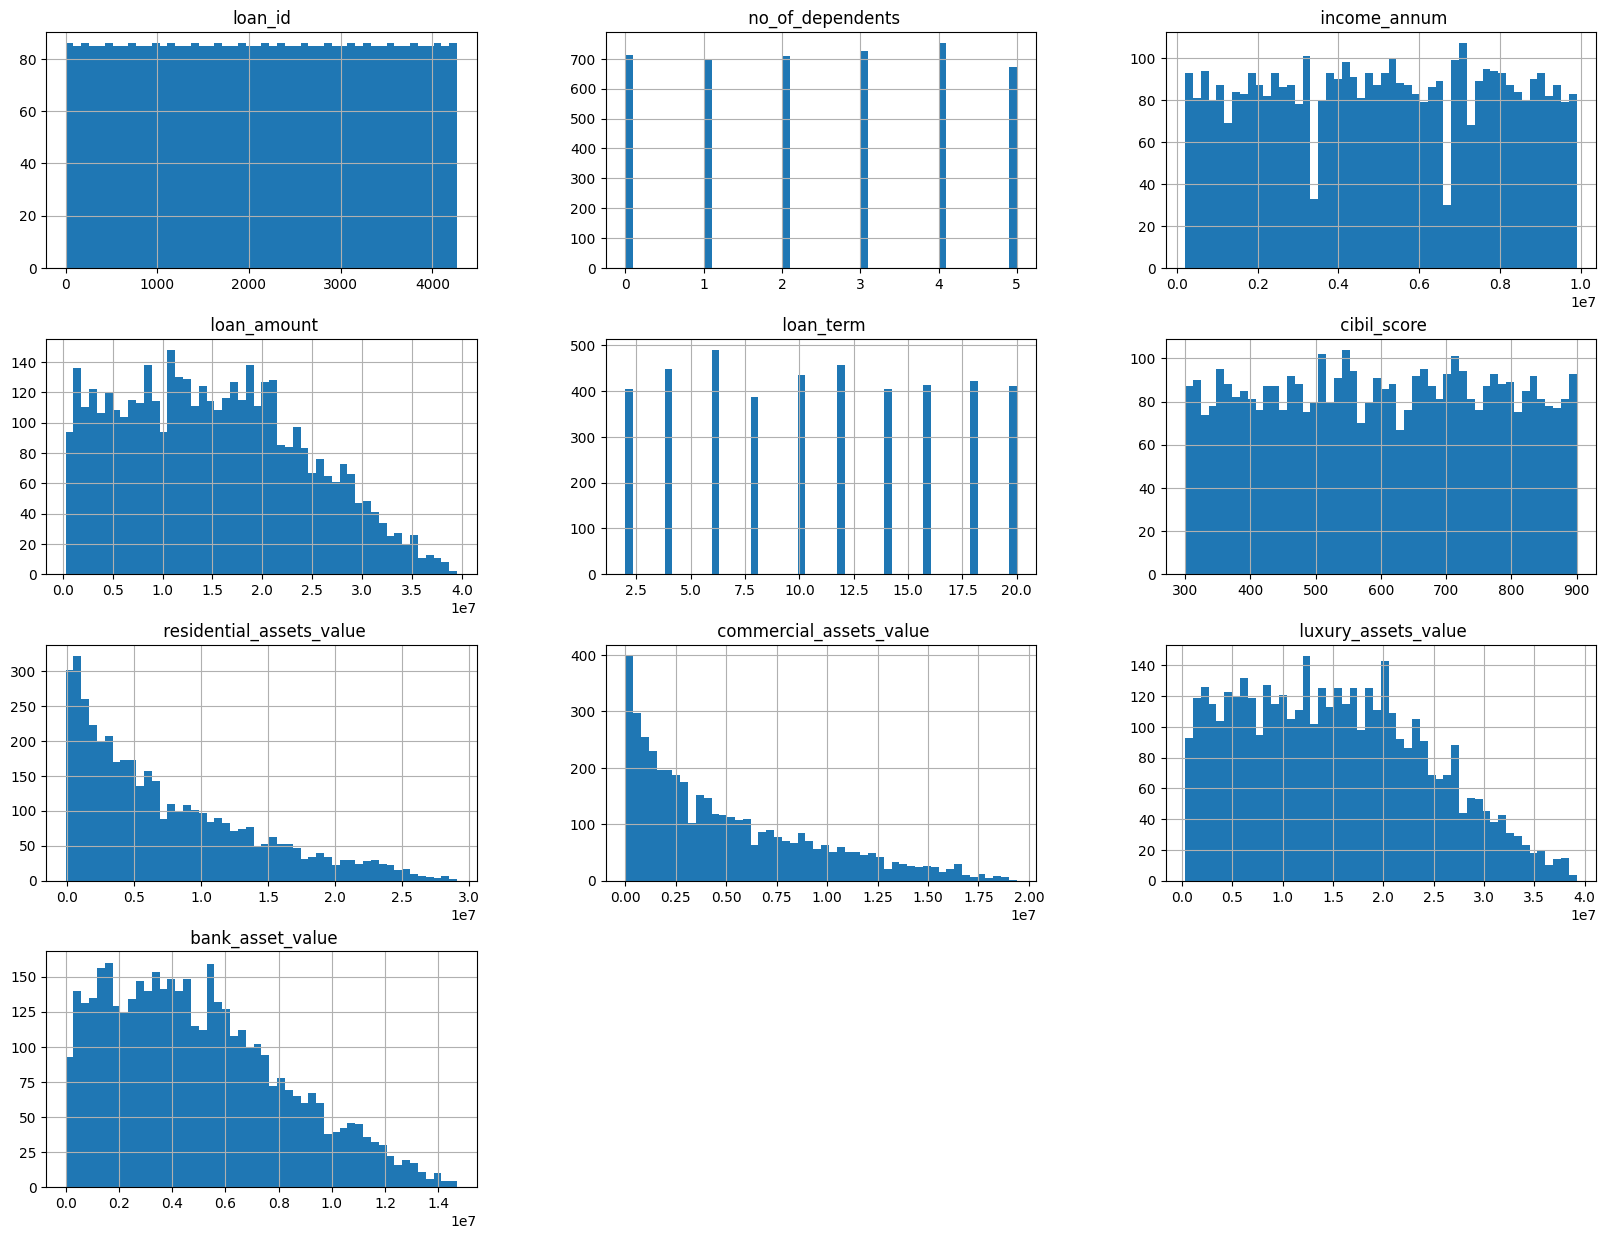

In [4]:
# Visualize the distributions in the dataset
numeric_features1 = loan_approval_df.select_dtypes(include='number')
numeric_features1.hist(bins=50, figsize=(20,15))
plt.show()

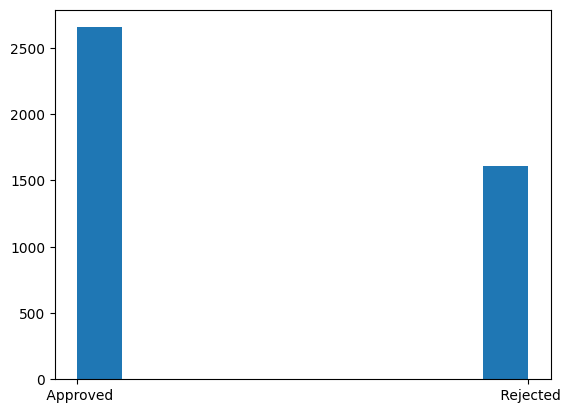

In [5]:
target1 = loan_approval_df[' loan_status']
plt.hist(target1)
plt.show()

**Data Preprocessing**

In [6]:
# First check if there are missing values
loan_approval_df.isnull().values.any()
# Output: False

np.False_

So no missing values in the dataset, we dont need to fill anything.  Next step check for categorical values

In [7]:
# Check for categorical columns
loan_approval_df.select_dtypes(include=['category', 'object']).dtypes

# Output: education        object
# self_employed    object
# loan_status      object
# dtype: object

education        object
self_employed    object
loan_status      object
dtype: object

The ouput reveals that there are three categorical columns: education, self_employed and loan_status. loan_status being our target column.

In [8]:
print(loan_approval_df.columns)
# Output: Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       # ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       # ' residential_assets_value', ' commercial_assets_value',
       # ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      # dtype='object')


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


If you look at the names of the columns, you see that they include spaces. This is not noticiable at first, but in the future, when you want to call one of the columns, it could be an issue so as part of our preprocessing step, we are going to remove the spaces in the string of our column names.

This also taught me that sometimes it is when we start working on our model that we notice some preprocessing that we need to do to our data. And this may not be a common preprocessing ( at least to me) that is done to other types of dataset, but it is unique to yours.

In [9]:
# It has spaces in the column names so I'm going to remove it
loan_approval_df.columns = loan_approval_df.columns.str.strip()

# check
print(loan_approval_df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


Much better. Now looking at our dataset, we see that our dataset has different object types, some have numbers and some have strings or 'objects'. This means that the type of preprocessing we do on the numbers, we cannot apply it to the srings or 'object'. It is best to seperate them according to their data types to avoid errors when preprocessing.

In [10]:
# Now we know that columns: education, self_employed, loan_status are all object datatypes
# Separate them - Create a pipeline to preprocess the numerical columns and the categorical columns

# First, features with 'number' data type
numeric_features = loan_approval_df.select_dtypes(include='number').columns.tolist() # Selecting the list of numerical columns
numeric_features.remove('loan_id') # loan_id is the index, we don't need it as datafram already provides the index

# check
print("Numeric Columns: ", numeric_features)

# Now features with 'object' data type, this would be the categorical features
categorical_features = loan_approval_df.select_dtypes(include='object').columns.tolist()

# check
print("Categorical Columns: ", categorical_features)

# Drop loan_status because that is the target, we will process it differently
categorical_features.remove('loan_status')

#check
print("Categorical Columns: ", categorical_features)

Numeric Columns:  ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Columns:  ['education', 'self_employed', 'loan_status']
Categorical Columns:  ['education', 'self_employed']


The next step is to normalize the numerical features and change the labels in the categorical feaures into binary numbers that the python would recognize. We will be using scikit-learns StandardScaler and OneHotEncoder for this. Also it will be done insode sciki-learn's estimator, ColumnTransformer. This is very useful to process and apply both preprocessing tools at the same time to all columns.

In [11]:
# Now create a preprocessing pipeline for both of them
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Use ColumnTransformer to preprocess the different columns in the dataframe
# StandardScaler is used to normalize the numeric features
# OneHotEncoder is used to turn the cat fetures into binary
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

This doesn't do anything to the dataset yet, we have just initialized it under the variable preprocessor and we will pass it through a pipeline. This is good as it avoids data leakage. A con I think I saw in this is that I'm not able to see the results step by step until the end, but who cares (Future me: Turns out I do)

The next step of building our models requires that our dataset is split, so lets do that now

In [12]:
# Before we continue lets split our data into features and target, then train, validation and test

x = loan_approval_df.drop(columns=['loan_status', 'loan_id']) # Features. Remembere we are removing loan_id because df already indexes it and we dont want it to affect the model
y = loan_approval_df['loan_status'] # Target
#y = y.to_frame()

# check
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [13]:
type(x)

pandas.core.frame.DataFrame

In [14]:
type(y)

pandas.core.series.Series

In [15]:
y.head()

0     Approved
1     Rejected
2     Rejected
3     Rejected
4     Rejected
Name: loan_status, dtype: object

Now we have to preprocess y. We cannot do it in the pipeline, because if you recall the preprocessor I initialized, will only be used for the features because we will be passing it through a pipeline that preprocesses and learns bla bla bla, you'll see.

We will be using LabelEncoder to process y. This will encode (change) the labels to be values between 0 and 1 so in essence, "Approved" will be 0 and "Rejected" will be 1. Now you might be tempted to ask "Evidence, why didn't you use LabelEncoder to encode the features too?" Because labelencoder should be used for target values (see documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html ). And now you may be tempted to ask "Evidence, why didn't you use OneHotEncoder to encode the target, SURELY the documentation didn't say you can only use it for the features?". Leave me alone!

But in all seriousness, I wanted to use OneHotEncoder before, and I tried using it, then I got the error that y should be a dataframe and not a series. so I changed it to a series and then when I fed it to the model to be trained, I got the error that the model was expecting a series for y  or a 1-dimensional array and not a dataframe so I said a bunch of bad words. I asked ChatGPT what I could do and it said "Oh try LabelEncoder" so I did and it worked. We learn everyday.

In [16]:
# We have to preprocess y now because we cannot preprocess it in the pipeline.
# The only thing we need to do is to labelencode it
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)
# Approved - 0, Rejected - 1

y_encoded

array([0, 1, 1, ..., 1, 0, 0])

Now split into train set, validation set, and test set. Remember do not try the test set until you are sure of your model! Helps with overfitting and it'll tell you the truth about your model when you finally put it in.

In [17]:
# Now split into train, val, and test set
from sklearn.model_selection import train_test_split

# First split into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.15, random_state=42)

# Then split X_train further to get validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state=42)

**Model Building**

Now let's build our model. We will be using Scikit-Learn's LogisticRegression class to fit (learn). We will also use GridSearchCV (from sciki-learn as well) to find the best parameters for our logisticRegression class, then this model with the  best parameters will be used to test our validation and test set. We will create a pipeline to do everything. In this pipeline, first it would preprocess the data, (the preprocessor we created earlier), then it would fit it to the logistic classifier. This pipeline is passed into Gridsearch with the parameter grid that we have defined for it to test. So it would test it and out of them, it will find the best parameters.

In [18]:
# Great now that we have that, use GridSearchCV to find the best hyperparameters to train with
# Create a pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg_clf = LogisticRegression(random_state=42) 


# Define a pipeline with preprocissing and logistic regression classfier
pipeline = Pipeline([
    
    ('preprocessor', preprocessor), # Preprocessing step
    ('classifier', logreg_clf) # Fitting step
])

param_grid = [
    {
        'classifier__solver': ['liblinear'], 
        'classifier__penalty':['l1', 'l2'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
        'classifier__max_iter':[100, 200, 300, 400, 500],
        'classifier__class_weight':['balanced', None]  
    },
    {
        'classifier__solver': ['lbfgs'], 
        'classifier__penalty':['l2'],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
        'classifier__max_iter':[100, 200, 300, 400, 500],
        'classifier__class_weight':['balanced', None]
    }
]

# Create a GridSearchCV to search hyperparameters of the odel in the pipeline
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring=["accuracy", "f1"], cv=5, refit="accuracy", error_score='raise')

In [19]:
# Train the grid search on your data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['no_of_dependents',
                                                                          'income_annum',
                                                                          'loan_amount',
                                                                          'loan_term',
                                                                          'cibil_score',
                                                                          'residential_assets_value',
                                                                          'commercial_assets_value',
                                                                          'luxury_assets_value',
                                                                          'bank_asset_value']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['education',
                                                                          'self_e...
                          'classifier__max_iter': [100, 200, 300, 400, 500],
                          'classifier__penalty': ['l1', 'l2'],
                          'classifier__solver': ['liblinear']},
                         {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 500,
                                            1000],
                          'classifier__class_weight': ['balanced', None],
                          'classifier__max_iter': [100, 200, 300, 400, 500],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['lbfgs']}],
             refit='accuracy', scoring=['accuracy', 'f1'])

In [20]:
print(grid_search.best_params_)

{'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [21]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

**Evaluation**

The metrics we will be using to evaluate our model are:

* Accuracy
* F1 Score
* Precision
* Recall
* ROC-AUC
* Confusion Matrix


In [22]:
# Evaluate on validation data
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

y_pred_val = best_model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("Validation F1 Score:", f1_score(y_val, y_pred_val))
print("Validation Precision:", precision_score(y_val, y_pred_val))
print("Validation Recall Score:", recall_score(y_val, y_pred_val))
print("Validation ROC-AUC Score:", roc_auc_score(y_val, y_pred_val))

Validation Accuracy: 0.9339449541284404
Validation F1 Score: 0.9210526315789473
Validation Precision: 0.8786610878661087
Validation Recall Score: 0.967741935483871
Validation ROC-AUC Score: 0.9396636506687648


In [23]:
# Generate Confusion Matrix
from sklearn.metrics import confusion_matrix

print("Validation Confusion Matrix\n", confusion_matrix(y_val, y_pred_val))

Validation Confusion Matrix
 [[299  29]
 [  7 210]]


The Validation metrics look pretty high (good enough for me. Leave me alone!) so now let's check with the test data to see if it works or if it is just overfitting.

I think this is a good enough model to try on the test set

In [24]:
# Predicting with the test data
y_pred_test = best_model.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test F1 Score:", f1_score(y_test, y_pred_test))
print("Test Precision:", precision_score(y_test, y_pred_test))
print("Test Recall Score:", recall_score(y_test, y_pred_test))
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_pred_test))
print("Test Confusion Matrix\n", confusion_matrix(y_test, y_pred_test))

Test Accuracy: 0.9375975039001561
Test F1 Score: 0.9193548387096774
Test Precision: 0.8669201520912547
Test Recall Score: 0.9785407725321889
Test ROC-AUC Score: 0.9463782294033494
Test Confusion Matrix
 [[373  35]
 [  5 228]]


The precision score is pretty low at 87%. but the f1 score is 91% which i do not mind, bbut we can see that it is the recall score that is carrying it because it is at 97%. From the confusion Matrix, we can see that the amongst the falsely predicted values, the model incorrectly predicts negative values more. (FN = 35, FP = 5). So future iteration is to determine how to reduce that and increase precision. Although its not too bad in my opinion. I'm not a magician, leave me alone.

I would like to do further evaluation on the test set so let's plot the ROC Curve

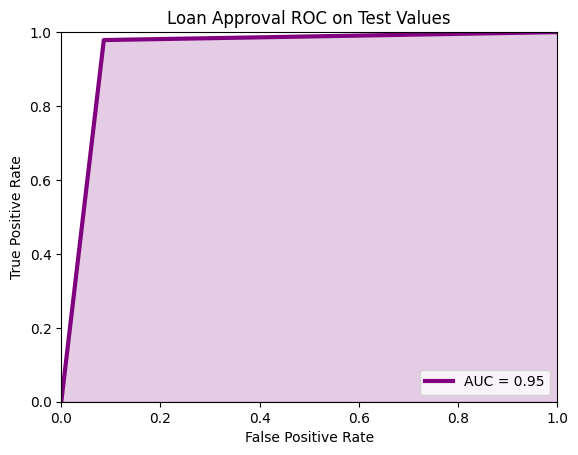

In [25]:
# Plot the ROC Curve
from sklearn.metrics import roc_curve, auc

# Calculate the fpr (false posive rate) and tpr (true positive rate) for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_pred_test)

# Calcualte the AUC
roc_auc = auc(fpr, tpr)

# Now Plot with matplotlib
plt.title('Loan Approval ROC on Test Values')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color = 'purple', linewidth = 3.0 )
plt.legend(loc = 'lower right')
plt.fill_between(fpr, tpr, color = 'purple', alpha = 0.2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Why does it have a sharp edge? ...anyway the AUC score shows 95% which is pretty good.

Now for further inverstigation, lets look at the feature coefficients

In [26]:
# Interpreting the Feature Coefficients

# Get the coefficients for the model
# To get it we need to get the classifier model (logistic Regression) in our pipeline model
logreg = best_model.named_steps['classifier']

# Now the the coefficients from the model
coefficients = logreg.coef_[0]

# Get the feature names (combine both to get one list of the features)
feature_names = numeric_features + categorical_features

# Compute the odds ratios (exponent of the coefficients)
odds_ratios = np.exp(coefficients)

# Now print the feature names with their corresponding coefficients and odds ratios
for feature, coef, ratio in zip(feature_names, coefficients, odds_ratios):
    print(f"Feature: {feature} | Coefficient: {coef} | Odds Ratio: {ratio}")

Feature: no_of_dependents | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: income_annum | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: loan_amount | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: loan_term | Coefficient: 0.2159453288815321 | Odds Ratio: 1.2410345284002295
Feature: cibil_score | Coefficient: -2.324062135093995 | Odds Ratio: 0.09787519473005969
Feature: residential_assets_value | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: commercial_assets_value | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: luxury_assets_value | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: bank_asset_value | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: education | Coefficient: 0.0 | Odds Ratio: 1.0
Feature: self_employed | Coefficient: 0.0 | Odds Ratio: 1.0


Now this is scary. This worries me a bit. why are most of the coefficients 0, even for income_annum? So it has not drive on loan approval in the model? I guess if the credit score is high it could tell that your income is high too. so since the model is using l1 it is very strict with what it uses. So only loan_term and cibil_score was used sort of. 

I want to see credit score how credit score influences approval rate? Maybe group it?

**More Exploratory Analysis - (Credit Score and Loan Term Influence on Approval)**

In [27]:
# Group the credit score into categories

"""
300-559: Poor
560-659: Fair
660-724: Good
725-759: Very Good
760-900: Excellent
"""

bins = [300, 560, 660, 725, 760, 900]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

loan_approval_df['credit_group'] = pd.cut(loan_approval_df['cibil_score'], bins, labels = labels)

# check
loan_approval_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,credit_group
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


In [28]:
# Now I want to check how much credit influnced approval. Going to use y_encoded (value form of loan_status) so that it could calculate mean. 
#(loan_status gave me an error)
# What percentaage of credit group were approved

loan_approval_y_encode =loan_approval_df.copy()

#loan_approval_y_encode.head()
loan_approval_y_encode['loan_status_num'] = loan_approval_y_encode['loan_status'].map({' Approved': 1, ' Rejected': 0})

#loan_approval_y_encode.head()

credit_approval_rate = loan_approval_y_encode.groupby('credit_group')['loan_status_num'].mean()

# format as percentage
credit_approval_rate = (credit_approval_rate * 100).round(2)

print(credit_approval_rate)

credit_group
Poor         14.55
Fair         99.70
Good         99.19
Very Good    99.21
Excellent    99.49
Name: loan_status_num, dtype: float64


C:\Users\Evidence\AppData\Local\Temp\ipykernel_520\3106042334.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_approval_rate = loan_approval_y_encode.groupby('credit_group')['loan_status_num'].mean()


Wow Wow Wow (okay ambulance), it seems like they are just dashing out loan these days. You only have to have a fair credit score to be 99% considered. Maybe the loan_term decreases it?

In [29]:
term_approval_rate = loan_approval_y_encode.groupby('loan_term')['loan_status_num'].mean()

# format as percentage
term_approval_rate = (term_approval_rate * 100).round(2)

print(term_approval_rate)

loan_term
2     77.97
4     81.88
6     57.55
8     56.99
10    52.52
12    60.53
14    59.01
16    57.28
18    60.90
20    57.42
Name: loan_status_num, dtype: float64


In [30]:
# Together maybe?
approval_rate_by_credit_term = loan_approval_y_encode.groupby(['loan_term', 'credit_group'])['loan_status_num'].mean()

# format as percentage
approval_rate_by_credit_term = (approval_rate_by_credit_term * 100).round(2)

print(approval_rate_by_credit_term)

loan_term  credit_group
2          Poor             50.00
           Fair            100.00
           Good            100.00
           Very Good       100.00
           Excellent       100.00
4          Poor             58.20
           Fair            100.00
           Good            100.00
           Very Good       100.00
           Excellent        98.26
6          Poor              5.56
           Fair            100.00
           Good             96.83
           Very Good       100.00
           Excellent        99.05
8          Poor              4.65
           Fair            100.00
           Good            100.00
           Very Good       100.00
           Excellent       100.00
10         Poor              4.69
           Fair             96.49
           Good            100.00
           Very Good       100.00
           Excellent        98.89
12         Poor              3.23
           Fair            100.00
           Good            100.00
           Very Good    

C:\Users\Evidence\AppData\Local\Temp\ipykernel_520\1426403046.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate_by_credit_term = loan_approval_y_encode.groupby(['loan_term', 'credit_group'])['loan_status_num'].mean()


It seems like from "Fair" you are most likely to get approved. I'm going to check them without grouping to get more information

In [31]:
# Together maybe, without grouping
approval_rate_by_credit_term = loan_approval_y_encode.groupby(['loan_term', 'cibil_score'])['loan_status_num'].mean()

# format as percentage
approval_rate_by_credit_term = (approval_rate_by_credit_term * 100).round(2)

approval_rate_by_credit_term_df = pd.DataFrame(approval_rate_by_credit_term)

approval_rate_by_credit_term_df.to_csv('approval_rate_credit_term.csv') # It wasn't showing all on the output here

So looking at it and with my eyes one after the other, it has revealed to me that if your credit score is >= 500, you are most likely, like 100% getting approved (except for one or two outliers). For loan_terms of < 4 years, you may also get approved but it reduces to 0% approval after 4 years.  This could be what the model captures. Recall that the model uses logistic regression with L1 regularization (GridSearch chose it not me!) This simplifies the model that is only retains the features that have the strongest influence. That is why other feature coefficients are zero. It could show that most likely, for whereever this dataset came from (MIT), there's like an  automatic approval for loans of people with credit score of 550 and above. This could be a business rule or something. (Idk, leave me alone).

In conclusion, the model is doing its job. A better model (like with decision trees) could capture other features and how they affect it but because it is Logistic Regression model it keeps it cut cut, linear, straight to the point, binary.

**TL:DR** - Credit Score has a high influence of getting approved. (550 and above) If you're loan term is less than 4 years with a low credit score, it may also help you get approved since the loan term is small.

In [32]:
# Save the model as a .pkl file
import joblib

joblib.dump(best_model, 'loan_approval_predictor.pkl')

['loan_approval_predictor.pkl']